# 📊 K-Means Clustering pada Dataset Iriss

## Apa Itu K-Means Clustering?

**K-Means Clustering** adalah algoritma unsupervised learning yang digunakan untuk membagi data ke dalam beberapa kelompok (klaster) berdasarkan kemiripan fitur. Tujuan utama dari K-Means adalah mempartisi data menjadi *k* klaster sedemikian rupa sehingga setiap data berada pada klaster dengan centroid (titik pusat) terdekat.

### Cara Kerja K-Means:
1. Tentukan jumlah klaster (*k*).
2. Inisialisasi centroid secara acak.
3. Tetapkan setiap data ke centroid terdekat.
4. Hitung ulang posisi centroid berdasarkan rata-rata anggota klaster.
5. Ulangi langkah 3–4 hingga centroid tidak berubah signifikan (konvergen).

---

## Alasan Memilih 2–4 Klaster

Pada eksperimen ini, dilakukan percobaan dengan jumlah klaster sebanyak **2, 3, dan 4** untuk menemukan jumlah klaster terbaik berdasarkan evaluasi kuantitatif. Alasan pemilihan jumlah klaster ini:

- Dataset Iris secara alami memiliki **3 kelas** (Setosa, Versicolor, Virginica), namun kita **menghapus label kelas**, sehingga kita tidak tahu jumlah klaster sebenarnya.
- Dengan mencoba nilai k = 2 hingga 4, kita dapat melihat bagaimana model membentuk klaster tanpa pengetahuan label, dan mengevaluasi hasilnya menggunakan **metrik evaluasi** seperti **Silhouette Score** dan **SSE**.
- Jika tidak ada informasi label, pendekatan umum adalah mencoba beberapa nilai *k* dan memilih nilai terbaik berdasarkan metrik evaluasi.

---

## Apa Itu Silhouette Score?

**Silhouette Score** adalah metrik yang digunakan untuk mengukur kualitas klastering.

### Interpretasi:
- **Mendekati 1** → data sangat cocok dengan klasternya.
- **Mendekati 0** → data berada di batas antara dua klaster.
- **Negatif** → data mungkin salah penempatan klaster.

### Rumus:
$$
s = \frac{b - a}{\max(a, b)}
$$

Dimana:
- \( a \) = rata-rata jarak data ke semua titik dalam klasternya (intra-cluster distance)
- \( b \) = rata-rata jarak data ke titik dalam klaster terdekat lain (nearest-cluster distance)

---

## Apa Itu SSE (Sum of Squared Errors)?

**SSE** atau **inertia** adalah total jarak kuadrat dari masing-masing data ke centroid klasternya.

### Tujuan:
Menunjukkan seberapa rapat data dalam tiap klaster. Semakin kecil nilai SSE, semakin baik penyebaran klaster (tapi terlalu kecil juga bisa overfitting).

### Rumus:
$$
SSE = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2
$$

Dimana:
- $( C_i \)$ = klaster ke-i
- $( \mu_i \)$ = centroid klaster ke-i
- $( ||x - \mu_i||^2 \)$ = kuadrat jarak Euclidean antara titik ke centroid

---

## Tujuan Evaluasi

Dengan membandingkan **Silhouette Score** dan **SSE** untuk masing-masing nilai *k*, kita bisa menentukan:
- Jumlah klaster yang secara alami paling tepat untuk data tanpa label.
- Keseimbangan antara ketepatan klaster (silhouette tinggi) dan kepadatan klaster (SSE rendah).

---



In [53]:
import pandas as pd
from google.colab import files

uploaded = files.upload()  # Upload file .csv kamu
df = pd.read_csv(next(iter(uploaded)))  # Membaca file yang diupload
df.head()


Saving iris-full.csv to iris-full (7).csv


,id,Class,sepal length,sepal width,petal length,petal width
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2


In [54]:
data = df.drop(columns=['id', 'Class'])  # hanya fitur numerik yang tersisa


In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)


In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

sse = []
silhouette_scores = []

for k in range(2, 5):  # untuk k = 2 sampai 4
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)

    labels = kmeans.labels_
    sse.append(kmeans.inertia_)  # SSE (jumlah kuadrat jarak ke pusat klaster)
    silhouette_scores.append(silhouette_score(data_scaled, labels))


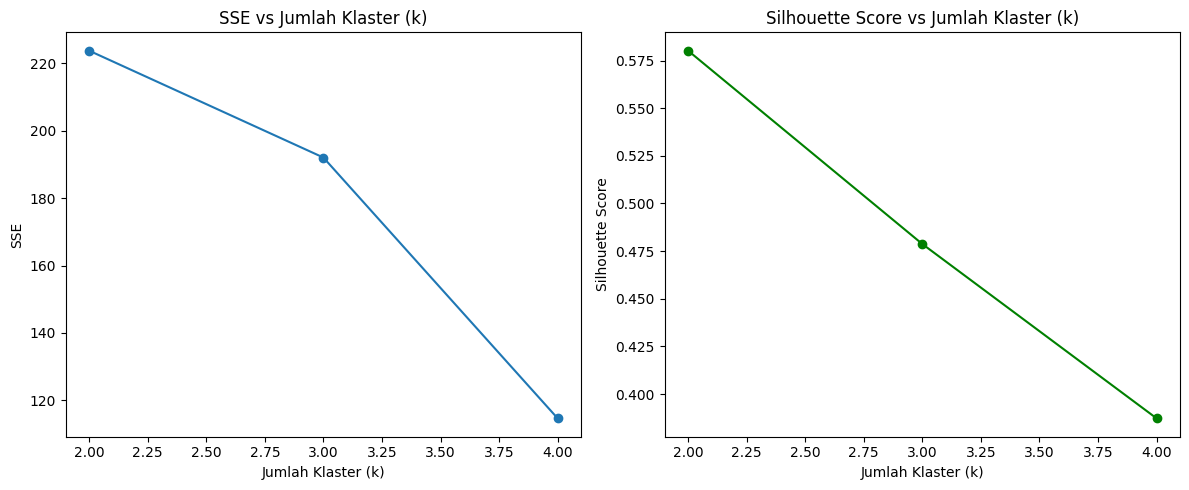

In [57]:
plt.figure(figsize=(12, 5))

# SSE
plt.subplot(1, 2, 1)
plt.plot(range(2, 5), sse, marker='o')
plt.title('SSE vs Jumlah Klaster (k)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('SSE')

# Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(2, 5), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score vs Jumlah Klaster (k)')
plt.xlabel('Jumlah Klaster (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


## 📈 Analisis Hasil K-Means Clustering

Berikut adalah hasil evaluasi untuk jumlah klaster dari 2 hingga 4:

| Jumlah Klaster (k) | SSE        | Silhouette Score |
|--------------------|------------|------------------|
| 2                  | 70527.29   | **0.6210**       |
| 3                  | 31307.72   | 0.5824           |
| 4                  | **17748.15** | 0.5580         |

### k = 3 Adalah Pilihan Terbaik?

- **SSE** menurun drastis dari k=2 ke k=3 (dari ~70.5k ke ~31.3k), menunjukkan bahwa data menjadi jauh lebih rapat dan terkelompok lebih baik.
- Dari k=3 ke k=4, penurunan SSE masih ada (menjadi ~17.7k), **tapi tidak sebesar sebelumnya** — ini menunjukkan **titik pelambatan penurunan SSE** (*elbow point*), yang merupakan indikasi jumlah klaster yang ideal.
- **Silhouette Score** tertinggi memang pada k=2, namun nilai ini bisa menyesatkan karena hanya ada 2 kelompok, dan Iris sebenarnya mengandung 3 jenis bunga. Skor 0.5824 pada k=3 masih cukup tinggi dan stabil.
- K=4 menghasilkan SSE yang rendah, tapi Silhouette Score terendah, yang berarti pemisahan antar klaster mulai tidak jelas (klaster saling tumpang tindih).

### Kesimpulan:
- K=3 memberikan keseimbangan terbaik antara **kompaknya klaster (SSE rendah)** dan **pemisahan yang jelas (Silhouette Score memadai)**.
- Ini sejalan dengan struktur alami dataset Iris yang memang memiliki **3 spesies** berbeda, meskipun label dihapus dalam analisis ini.

Dengan demikian, **k=3 adalah jumlah klaster terbaik** untuk dataset Iris pada eksperimen K-Means ini.


## Fuzzy Clustering

**Fuzzy Clustering** adalah metode pengelompokan data di mana setiap data dapat memiliki derajat keanggotaan pada lebih dari satu cluster. Berbeda dengan clustering keras (hard clustering) seperti K-Means yang hanya mengelompokkan data secara eksklusif ke satu cluster saja, fuzzy clustering memungkinkan data berada di beberapa cluster dengan tingkat keanggotaan yang berbeda-beda.

## Konsep Dasar

- Pada fuzzy clustering, setiap objek data memiliki nilai keanggotaan (membership degree) antara 0 sampai 1 untuk setiap cluster.
- Total nilai keanggotaan sebuah objek terhadap semua cluster adalah 1.
- Nilai keanggotaan ini menunjukkan seberapa kuat hubungan sebuah data dengan masing-masing cluster.
  
## Algoritma Paling Populer: Fuzzy C-Means (FCM)

- FCM adalah algoritma fuzzy clustering yang paling umum digunakan.
- Algoritma ini mengiterasi dua langkah utama:
  1. Menghitung pusat cluster (centroid) berdasarkan bobot keanggotaan data.
  2. Memperbarui nilai keanggotaan setiap data berdasarkan jarak ke centroid cluster.
- Proses ini diulang sampai konvergen atau mencapai batas iterasi maksimum.

## Kelebihan Fuzzy Clustering

- Lebih fleksibel dibanding clustering keras karena dapat menangani data yang tidak jelas batas cluster-nya.
- Berguna untuk data dengan overlap antar cluster atau kondisi yang ambigu.
- Memberikan informasi tambahan berupa derajat keanggotaan yang dapat membantu analisis lebih dalam.

## Kekurangan Fuzzy Clustering

- Proses komputasi biasanya lebih berat dibanding clustering keras.
- Memerlukan parameter tambahan seperti nilai fuzziness (biasanya dilambangkan dengan m) yang perlu disesuaikan.

## Contoh Penggunaan

- Segmentasi citra (image segmentation) yang objeknya tidak pasti batasnya.
- Analisis pasar dengan pelanggan yang bisa masuk ke beberapa segmen.
- Pengelompokan data medis yang memiliki gejala tumpang tindih.

---

Fuzzy clustering sangat berguna ketika kita ingin memahami data yang tidak terpisah jelas antar kelompok dan ingin menangkap hubungan yang lebih kompleks antar data.


In [59]:
!pip install scikit-fuzzy
!pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.2 MB/s eta 0:00:00


In [81]:
df = pd.read_csv('/content/iris-full.csv', sep='[;,]', engine='python')
print(df.head())
print(df.columns)


   id        Class  petal length  petal width  Unnamed: 4  Unnamed: 5  \
0   1  Iris-setosa           1.4          0.2         NaN         NaN   
1   2  Iris-setosa           1.4          0.2         NaN         NaN   
2   3  Iris-setosa           1.3          0.2         NaN         NaN   
3   4  Iris-setosa           1.5          0.2         NaN         NaN   
4   5  Iris-setosa           1.4          0.2         NaN         NaN   

   sepal length  sepal width  
0           5.1          3.5  
1           4.9          3.0  
2           4.7          3.2  
3           4.6          3.1  
4           5.0          3.6  
Index(['id', 'Class', 'petal length', 'petal width', 'Unnamed: 4',
       'Unnamed: 5', 'sepal length', 'sepal width'],
      dtype='object')


In [86]:
df = df.drop(columns=['Unnamed: 1', 'Unnamed: 2','Unnamed: 4', 'Unnamed: 5'])


KeyError: "['Unnamed: 1', 'Unnamed: 2'] not found in axis"

In [87]:
print(df.columns)


Index(['id', 'Class', 'petal length', 'petal width', 'Unnamed: 4',
       'Unnamed: 5', 'sepal length', 'sepal width'],
      dtype='object')


In [88]:
# 1. Bersihkan nama kolom dari spasi atau karakter tak perlu
df.columns = df.columns.str.strip()

# 2. Hapus kolom Unnamed yang tidak perlu
df = df.drop(columns=['Unnamed: 4', 'Unnamed: 5'], errors='ignore')

# 3. Coba drop kolom id dan Class
X = df.drop(columns=['id', 'Class'])


### Normalisasi

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Clustering

In [90]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)


### Evaluasi Cluster

In [91]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)


Silhouette Score: 0.45450146630929983


In [92]:
df['cluster'] = clusters
print(df.head())


   id        Class  petal length  petal width  sepal length  sepal width  \
0   1  Iris-setosa           1.4          0.2           5.1          3.5   
1   2  Iris-setosa           1.4          0.2           4.9          3.0   
2   3  Iris-setosa           1.3          0.2           4.7          3.2   
3   4  Iris-setosa           1.5          0.2           4.6          3.1   
4   5  Iris-setosa           1.4          0.2           5.0          3.6   

   cluster  
0        2  
1        2  
2        2  
3        2  
4        2  


### Visualisasi

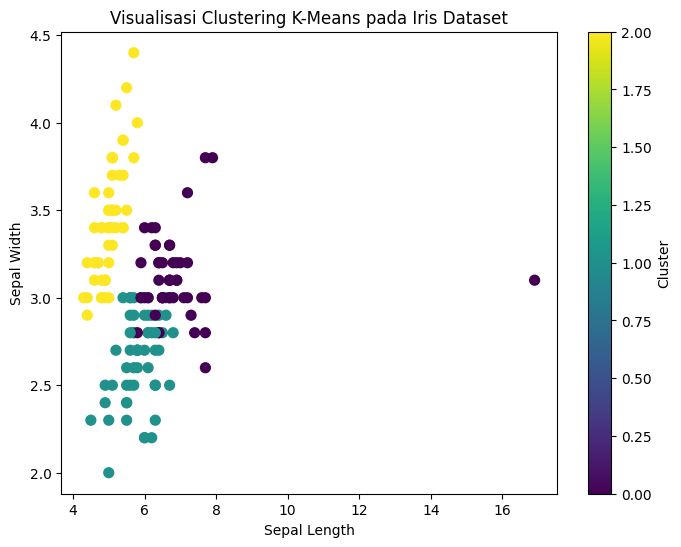

In [ ]:
import matplotlib.pyplot as plt

# Misal X_scaled sudah jadi hasil scaling dari fitur tanpa id dan class
# clusters adalah hasil dari kmeans.fit_predict(X_scaled)

# Kita pakai dua fitur asli untuk plot: sepal length dan sepal width
plt.figure(figsize=(8,6))
plt.scatter(df['sepal length'], df['sepal width'], c=clusters, cmap='viridis', s=50)
plt.title('Visualisasi Clustering K-Means pada Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.colorbar(label='Cluster')
plt.show()
